# Code to produce figure 6

### Zoïs Moitier (2021)
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

import Analytic
import BIE
import Plot

%matplotlib inline

## Parameters

In [2]:
## Incident field parameters
k = 2  # wavenumber direction of the plane wave
M = 15  # 2M+1 number of mode in the analytic sum

In [3]:
## Discretization parameters
N = 64  # Number of quadrature points

## Internal plotting functions

In [4]:
def calc_err(result, u_ana):
    return np.abs(result[0] - u_ana).max() / np.abs(u_ana).max()

In [5]:
def err_αε(α_param, ε_param):
    α_min, α_max = α_param[0], α_param[1]
    nb_α = α_param[2]
    α_vec, α_str = Plot.linspace_alpha(α_min, α_max, nb_α)

    ε_min, ε_max = ε_param[0], ε_param[1]
    nb_ε = ε_param[2]
    ε_vec, ε_str = Plot.logspace_epsilon(ε_min, ε_max, nb_ε)

    θ, _ = BIE.grid(N)

    err = np.empty((nb_ε, nb_α))
    for i, ε in enumerate(ε_vec):
        c, ξ0 = Analytic.ellipse_param(1, ε)

        for j, α in enumerate(α_vec):
            in_field = Analytic.field_plane_wave(α, k, c, M)
            sc_field = Analytic.solve_field(in_field, ξ0, 1)

            x, y = ε * np.cos(θ), np.sin(θ)
            ξ, η = Analytic.to_elliptic(c, x, y)
            u_ana = Analytic.eval_field(sc_field, ξ, η) + Analytic.eval_field(
                in_field, ξ, η
            )

            err[i, j] = calc_err(
                BIE.helmholtz_qpax(ε, k, Analytic.expansion_trace(in_field), N), u_ana
            )

    return (err, α_vec, α_str, ε_vec, ε_str)

In [6]:
def plot_heatmap(α_param, ε_param):
    err, _, α_str, _, ε_str = err_αε(α_param, ε_param)

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    log_norm_err = LogNorm(err.min(), err.max())
    sns.heatmap(
        err,
        ax=ax,
        cmap="YlGnBu_r",
        norm=log_norm_err,
        xticklabels=α_str,
        yticklabels=ε_str,
    )
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\varepsilon$")
    ax.set_aspect("equal", "box")

    cbar_ax = fig.axes[-1]
    cbar_ax.tick_params(which="minor", length=0)

    return None

In [7]:
def plot_εcv(α_param, ε_param, markers):
    err, _, α_str, ε_vec, _ = err_αε(α_param, ε_param)

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    ε_ = np.array([1e-8, 1e-3])
    ax.loglog(ε_, 10 ** (-1) * ε_, "k", label=r"$\mathcal{O}(\varepsilon)$")

    ε_ = np.array([1e-7, 1e-3])
    ax.loglog(ε_, 10 ** (-0.5) * ε_ ** 2, "k--", label=r"$\mathcal{O}(\varepsilon^2)$")

    for n, (marker, leg) in enumerate(zip(markers, α_str)):
        ax.loglog(ε_vec, err[:, n], f"{marker}--", label=leg)

    ax.set_xlim(1e-8 / 10 ** 0.5, 1 * 10 ** 0.5)
    ax.set_ylim(1e-16 / 10, 10)
    ax.grid(True)
    ax.legend(loc=4, fontsize=15)

    ax.minorticks_off()

    return None

## Heatmap of the relative error for different directions

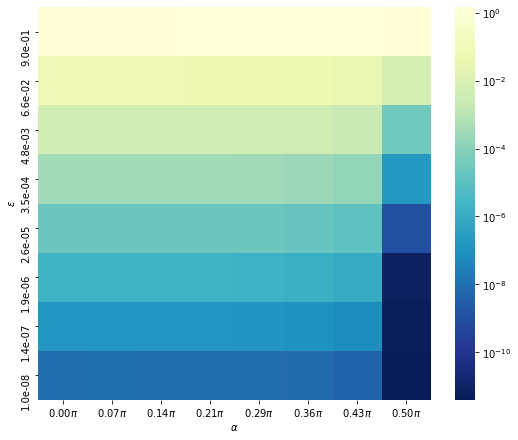

In [8]:
plot_heatmap((0, 0.5, 8), (1e-8, 0.9, 8))

## Convergence plot of the relative error for different directions

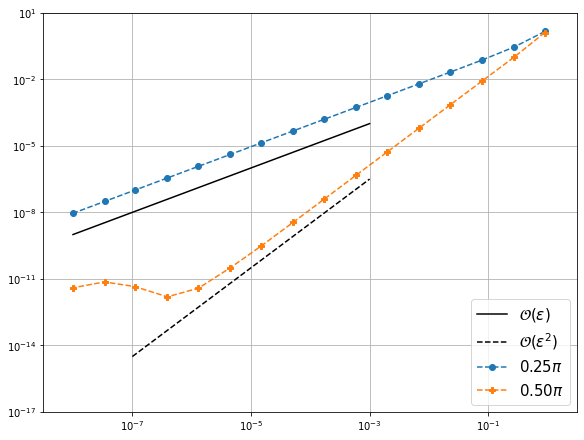

In [9]:
plot_εcv((0.25, 0.5, 2), (1e-8, 0.9, 16), ["o", "P"])